In [1]:
from gcsa.event import Event
from gcsa.google_calendar import GoogleCalendar
from gcsa.recurrence import Recurrence, DAILY, SU, SA

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd

from datetime import datetime, timedelta, date
import dateutil
from dateutil.parser import parse
import calendar
import numpy as np
from circle_cal.model import CalendarElement
import circle_cal as cc
import circle_cal.model as model
import circle_cal.plot as ccplot
import pathlib
from rich import print
import pytz
from pytz import timezone

0.16


In [2]:
cred = pathlib.Path('/Users/kdavis10/.config/.credentials')
cred_json = "pygooglecal.apps.googleusercontent.com.json"

try:
    gcal = GoogleCalendar('kdavis10@nd.edu',
                          credentials_path=cred / cred_json)
except Exception as e:
    (cred / "token.pickle").unlink()
print(list(gcal.get_calendar_list()))

[
    <CalendarListEntry None - (Weather)>,
    <CalendarListEntry None - (Payments)>,
    <CalendarListEntry None - (Axis Ludi Calendar)>,
    <CalendarListEntry None - (NYT Astronomy and Space Calendar)>,
    <CalendarListEntry None - (LIPS 2015)>,
    <CalendarListEntry None - (ND-DVT Provisional Shows)>,
    <CalendarListEntry None - (keithwdavis@gmail.com)>,
    <CalendarListEntry None - (Work)>,
    <CalendarListEntry None - (Cognoscenti)>,
    <CalendarListEntry None - (Academic Calendar)>,
    <CalendarListEntry None - (Descriptive Astronomy)>,
    <CalendarListEntry None - (DVT Student Work Schedule)>,
    <CalendarListEntry None - (PTE Meal Plan (recipes))>,
    <CalendarListEntry None - (LIPS 2013 Calendar (August 2 Revision))>,
    <CalendarListEntry None - (indivisibleIN02 Action Calendar)>,
    <CalendarListEntry None - (Clemson Planetarium)>,
    <CalendarListEntry None - (Birthdays)>,
    <CalendarListEntry None - (Remember The Milk)>,
    <CalendarListEntry None - (Phases of the Moon)>,
    <CalendarListEntry None - ( Wolverhampton)>,
    <CalendarListEntry None - (Chicago Fire)>,
    <CalendarListEntry None - (GenCon 2019)>,
    <CalendarListEntry None - (Holidays in United States)>,
    <CalendarListEntry None - (kdavis10@nd.edu)>,
    <CalendarListEntry None - (DVT Student Work UNAVAILABLE)>,
    <CalendarListEntry None - (Great Lakes Planetarium Association)>,
    <CalendarListEntry None - (Tasks Personal)>,
    <CalendarListEntry None - (Legend Secondary)>,
    <CalendarListEntry None - (Legend Main)>,
    <CalendarListEntry None - (TD Trips)>,
    <CalendarListEntry None - (Food)>,
    <CalendarListEntry None - (Tasks: Work)>,
    <CalendarListEntry None - (TD Work Projects)>
]

In [38]:
gcal.get_calendar_list_entry().background_color

'#ffad46'

310

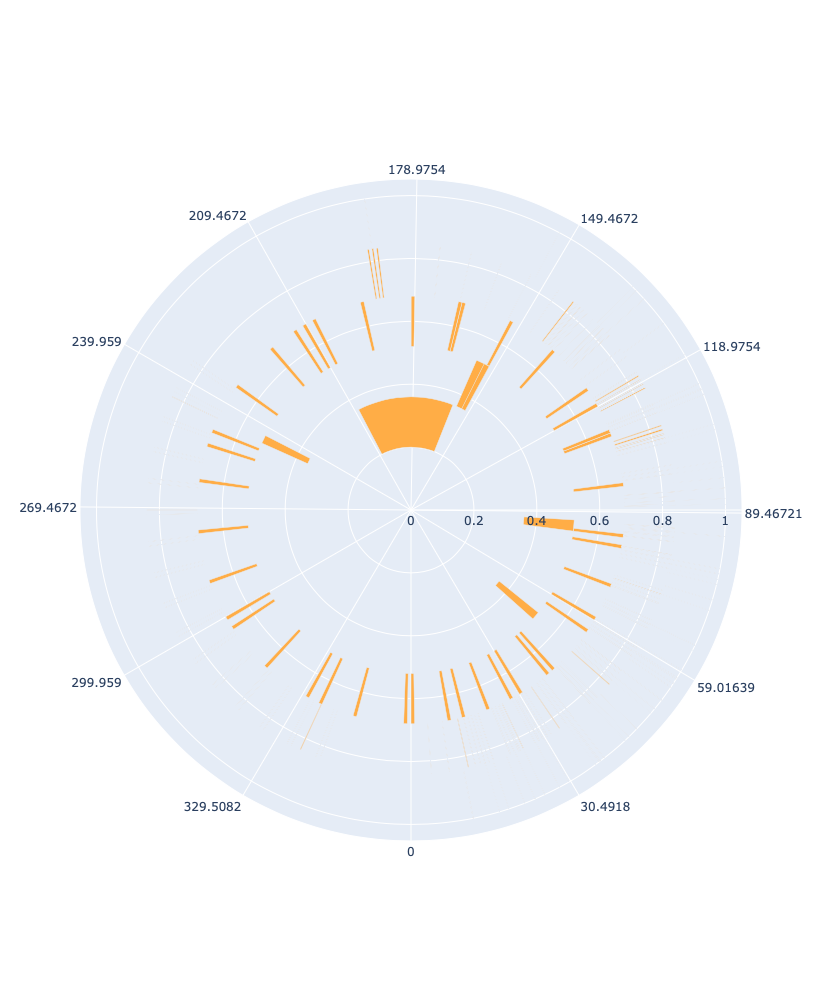

In [39]:
year = y24 = CalendarElement(year=2024)

eve = gcal.get_events(y24.start.datetime(), y24.stop.datetime(), single_events=True)
eve = [model.EventWrap(ev) for ev in eve if ev.other["eventType"] != "workingLocation"]
print(len(eve))

t = ccplot.events_to_trace(eve, 360 / 365)
t.marker.color=gcal.get_calendar_list_entry().background_color

rot = -90
fig = go.Figure(data=t)
sector = [ccplot.to_theta(y24[4].start.datetime())+rot,
          ccplot.to_theta(y24[7].stop.datetime())+rot]
fig.update_layout(height=1000)

fig.update_layout(dict(polar=
                       dict(angularaxis=
                            dict(direction="counterclockwise",
                                 
                                 rotation=rot,
                                 #showticklabels=False,
                                 tickmode="array", tickvals=[ccplot.to_theta(m.stop.datetime()) for m in y24],
                                 ),
                            #sector=sector,
                            
                           ),
 
                      ),
                 ),


fig.show()


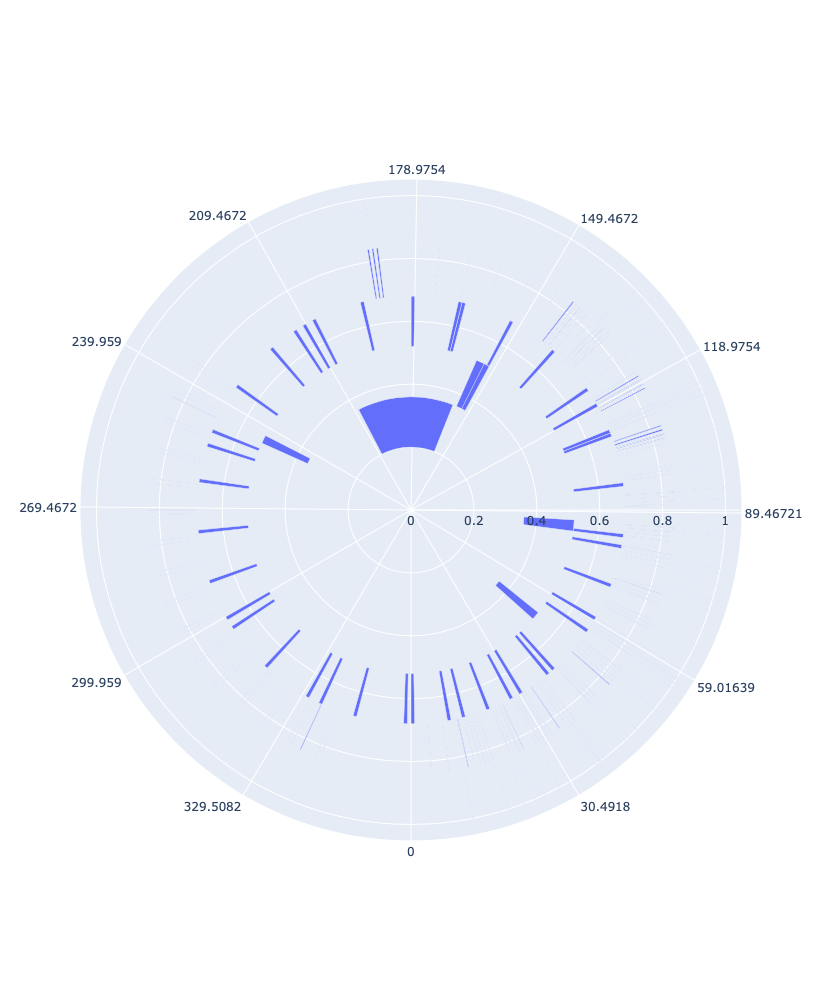

In [21]:
t.marker.color="red"
fig.show()

In [ ]:
year = y24 = CalendarElement(year=2024)

eve = gcal.get_events(y24.start.datetime(), y24.stop.datetime(), single_events=True)
eve = [model.EventWrap(ev) for ev in eve if (ev.end - ev.start) / timedelta(days=1) <=1]

def make_point_trace(events, d_to_th):
    
    r = []
    theta = []
    text = []
    for eve in events:
        r.append(.5)
        theta.append(model.to_theta(eve.mid)),
        #theta.append(eve.mid)
        text.append(" ".join((str(eve.mid), eve.summary)))
        
    t = go.Scatterpolar(r=r, theta=theta, mode="markers",
                        hovertext=text,
                        marker_symbol="diamond-open-dot",
                        )
    return t

t = make_point_trace(eve, 366 / 360)
rot = -90
fig = go.Figure(data=t)
sector = [cc.model.to_theta(y24[4].start.datetime())+rot,
          cc.model.to_theta(y24[7].stop.datetime())+rot]
fig.update_layout(height=1000)

fig.update_layout(dict(polar=
                       dict(angularaxis=
                            dict(direction="counterclockwise",
                                 
                                 rotation=rot,
                                 #showticklabels=False,
                                 tickmode="array", tickvals=[cc.model.to_theta(m.stop.datetime()) for m in y24],
                                 ),
                            sector=sector,
                            
                           ),
 
                      ),
                 ),


fig.show()

print(eve[0].mid)

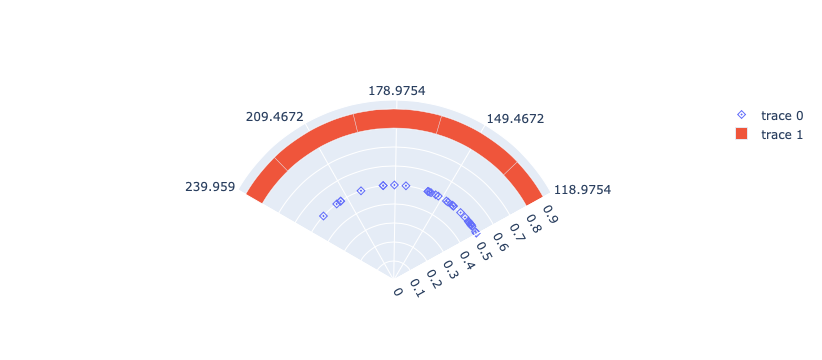

In [28]:
fig.add_trace(go.Barpolar(base = [.8] * len(year[3:8]),
                          r=[.1] * len(year[3:8]),
                          theta=[model.to_theta(m.mid) for m in year[3:8]],
                          width=[len(m) * 366 / 360 for m in year[3:8]]))
fig.show()

In [34]:
cals = list(gcal.get_calendar_list())

In [37]:
cals[0].color_id

'2'

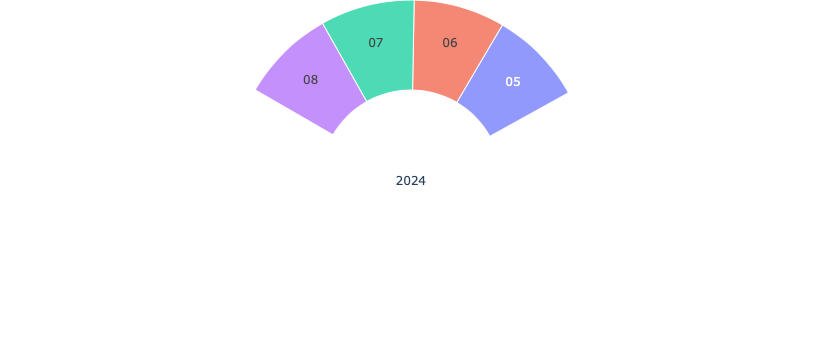

In [18]:
yeard = dict(labels=[str(year.year)] + [str(m.month) for m in year[4:8]],
             parents=[""] + [str(year.year)] * len(year[4:8]),
             values=[366] + [len(m) for m in year[4:8]]
            )
sbfig =go.Figure(go.Sunburst(
    labels=yeard["labels"],
    parents=yeard["parents"],
    values=yeard["values"],
    sort=False,
    rotation=model.to_theta(year[4][0].datetime())-90,
    branchvalues="total",
))
# Update layout for tight margin
# See https://plotly.com/python/creating-and-updating-figures/
sbfig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

sbfig.show()

[{'year': 2024, 'month': 5, 'type': 'CalendarElement'},
 {'year': 2024, 'month': 6, 'type': 'CalendarElement'},
 {'year': 2024, 'month': 7, 'type': 'CalendarElement'},
 {'year': 2024, 'month': 8, 'type': 'CalendarElement'}]

In [45]:
datetime(2024, 2, 30) in y24

ValueError: day is out of range for month

In [11]:
from gcsa.serializers.event_serializer import EventSerializer
print(EventSerializer.to_json(eve[289].gcsaevent))

{
    'id': 'pvmunjs5h896ot3ae9s79c5nb8_20240607',
    'summary': 'Jordan (Office)',
    'recurrence': [],
    'visibility': 'public',
    'attendees': [],
    'guestsCanInviteOthers': True,
    'guestsCanModify': False,
    'guestsCanSeeOtherGuests': True,
    'transparency': 'transparent',
    'attachments': [],
    'kind': 'calendar#event',
    'etag': '"3412066700954000"',
    'status': 'confirmed',
    'htmlLink': 
'https://www.google.com/calendar/event?eid=cHZtdW5qczVoODk2b3QzYWU5czc5YzVuYjhfMjAyNDA2MDcga2RhdmlzMTBAbmQuZWR1',
    'originalStartTime': {'date': '2024-06-07'},
    'iCalUID': 'pvmunjs5h896ot3ae9s79c5nb8@google.com',
    'sequence': 0,
    'workingLocationProperties': {
        'type': 'officeLocation',
        'officeLocation': {'buildingId': '1193', 'label': 'Jordan'}
    },
    'eventType': 'workingLocation',
    'start': {'date': '2024-06-07'},
    'end': {'date': '2024-06-08'},
    'reminders': {'useDefault': False}
}

In [14]:
eve[289].gcsaevent.other["eventType"]

'workingLocation'